# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?parse_dates=

In [1]:
# R. No gráfico que mede a variável 'educacao', houve queda significativa de 'secundario' e aumento 
# significativo de 'superior completo'.

In [2]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns
from datetime import datetime

np.random.seed(2360873)
N = 100

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df1 = df.drop(df[['Unnamed: 0','index']], axis=1)
df1['posse_de_veiculo'] = df1['posse_de_veiculo'].map({True: 1,False: 0})
df1['posse_de_imovel'] = df1['posse_de_imovel'].map({True: 1,False: 0})
df1['mau'] = df1['mau'].map({True: 1, False: 0})
df1.head()


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,2015-01-01,M,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,2015-01-01,M,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,2015-01-01,F,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,2015-01-01,M,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37


In [4]:
df1['data_ref'] = pd.to_datetime(df1['data_ref'])
df1['data_ref'] = df1['data_ref'].dt.strftime('%m-%Y')

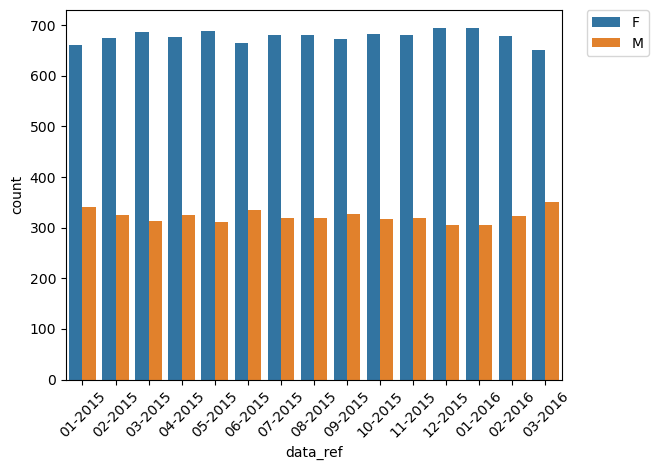

In [5]:
sns.countplot(x= df1['data_ref'],  hue = df1['sexo'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks( rotation=45);

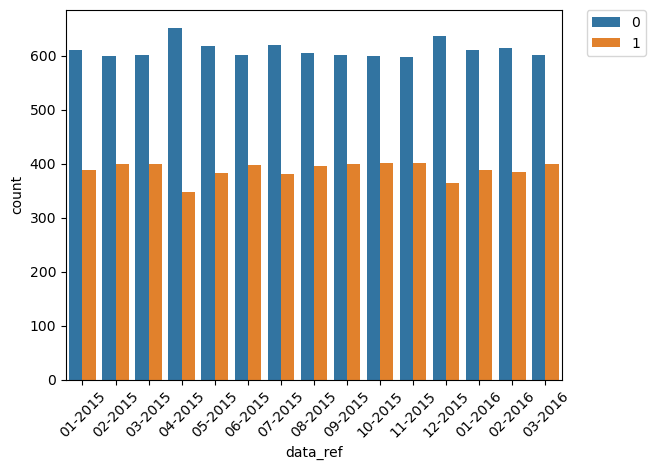

In [6]:
sns.countplot(x= df1['data_ref'],  hue = df1['posse_de_veiculo'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

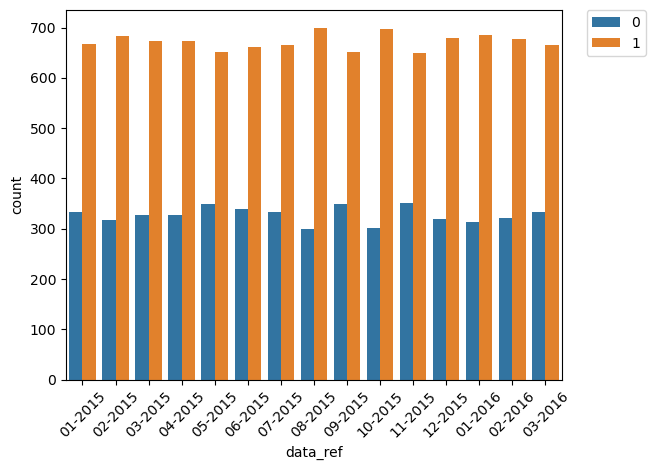

In [7]:
sns.countplot(x= df1['data_ref'],  hue = df1['posse_de_imovel'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

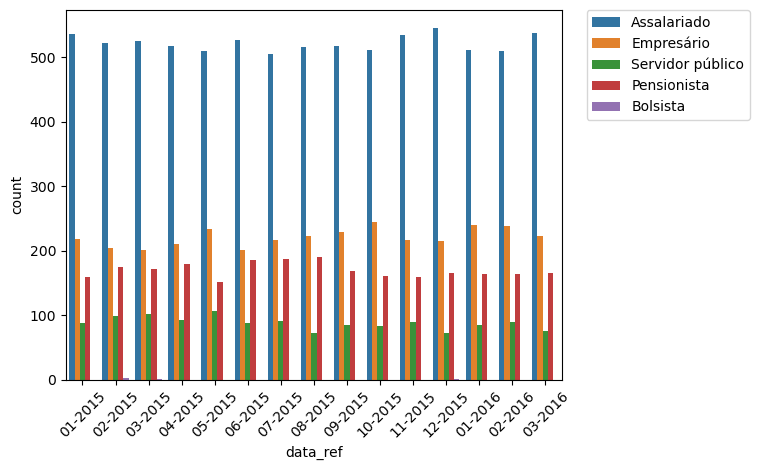

In [8]:
sns.countplot(x= df1['data_ref'],  hue = df1['tipo_renda'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

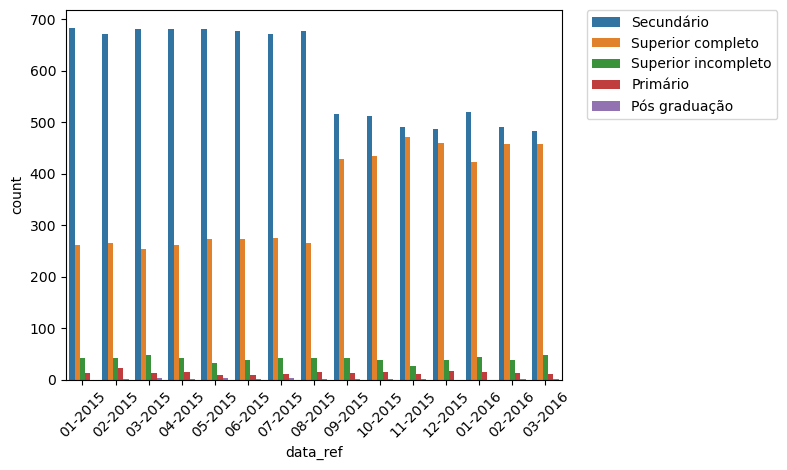

In [9]:
sns.countplot(x= df1['data_ref'],  hue = df1['educacao'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

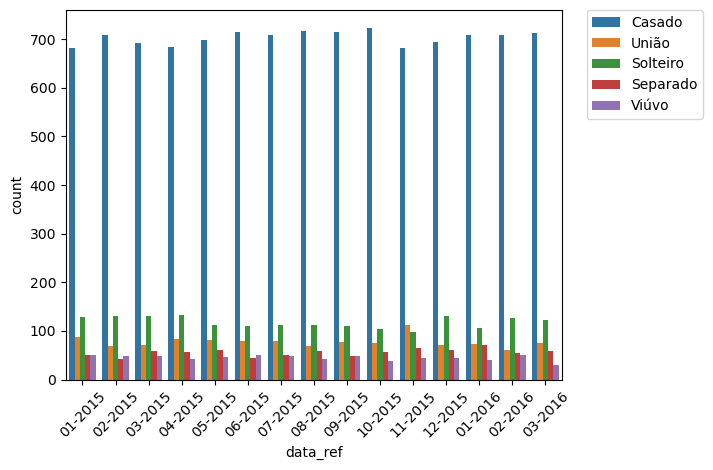

In [10]:
sns.countplot(x= df1['data_ref'],  hue = df1['estado_civil'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

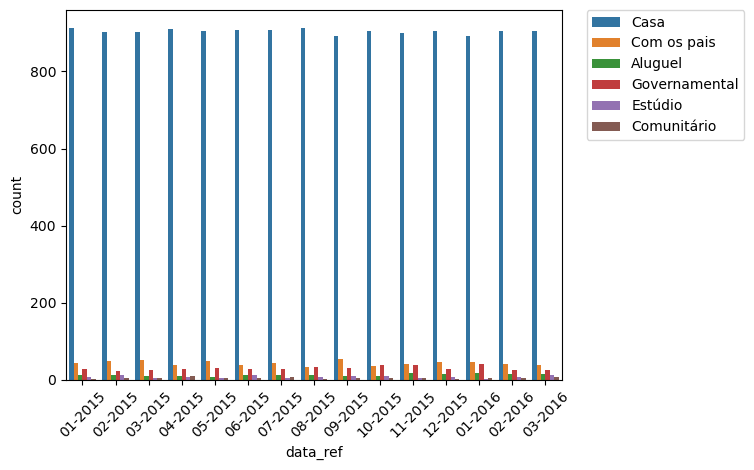

In [11]:
sns.countplot(x= df1['data_ref'],  hue = df1['tipo_residencia'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

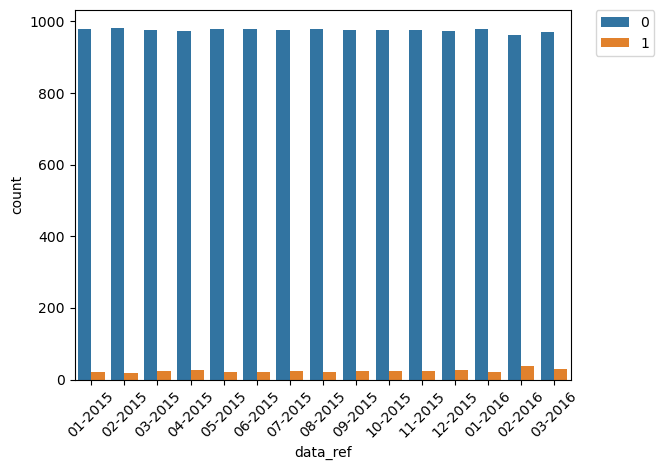

In [12]:
sns.countplot(x= df1['data_ref'],  hue = df1['mau'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [13]:
# R. Da análise dos gráficos abaixo verifica-se que a maioria das variáveis qualitativas mostrou distribuição estável pelo tempo.

# Destaca-se a variável 'educacao' com queda significativa de 'secundario' e aumento significativo de 'superior completo' e, 
# no variável 'tipo_renda' houve um leve aumento em 'empresario'

# Também é possível concluir que quem possui imóvel e veículo tende a apresentar uma renda maior.

# Sim. É possível utilizar as variáveis num modelo para previsão de renda.

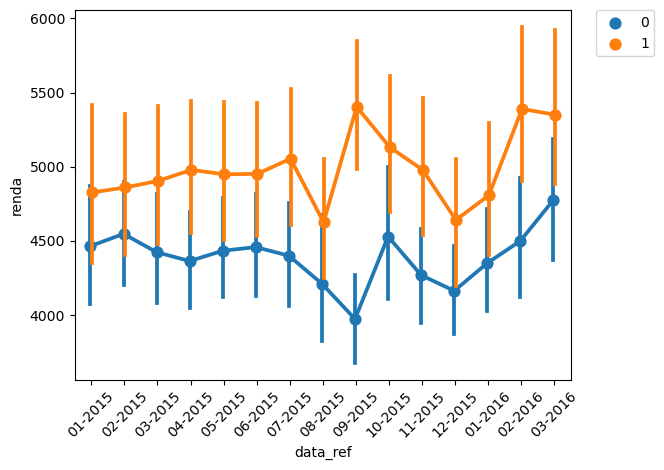

In [34]:
ax = sns.pointplot(x='data_ref', y='renda',hue='posse_de_veiculo', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

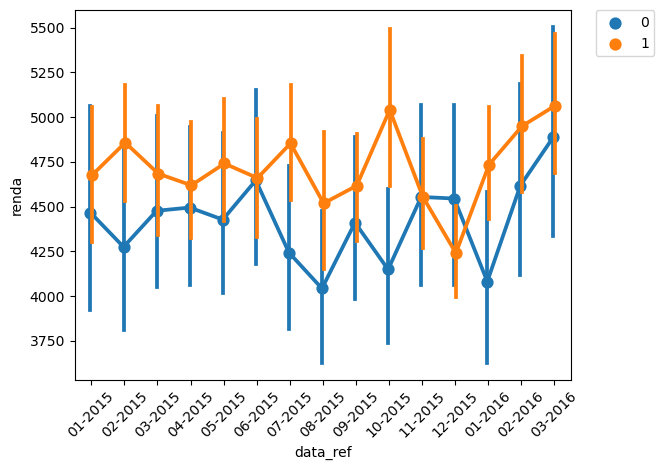

In [33]:
ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_imovel', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45);

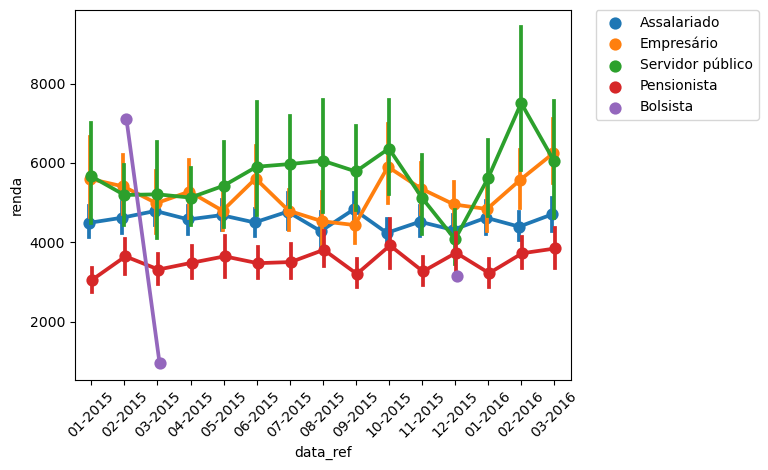

In [26]:
ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_renda', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

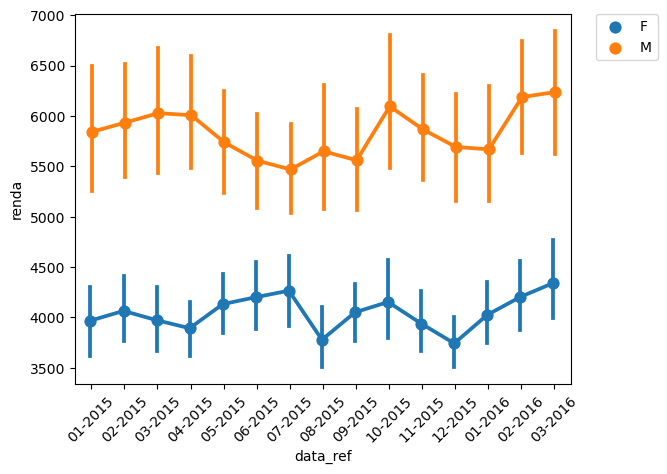

In [27]:
ax = sns.pointplot(x='data_ref', y='renda', hue='sexo', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

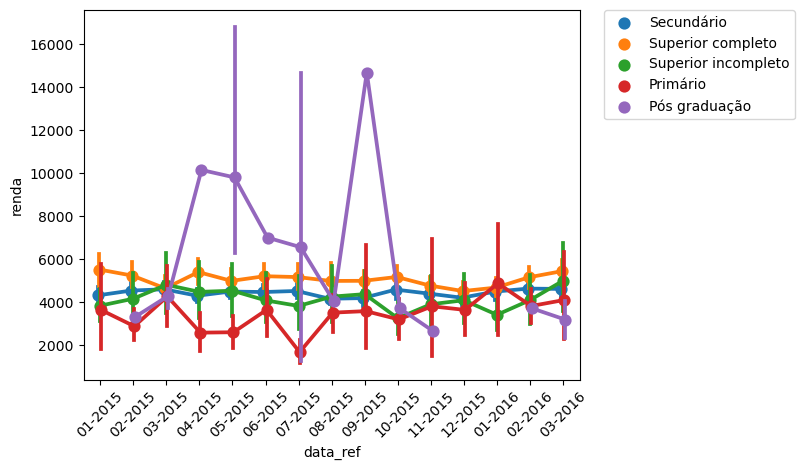

In [28]:
ax = sns.pointplot(x='data_ref', y='renda', hue='educacao', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

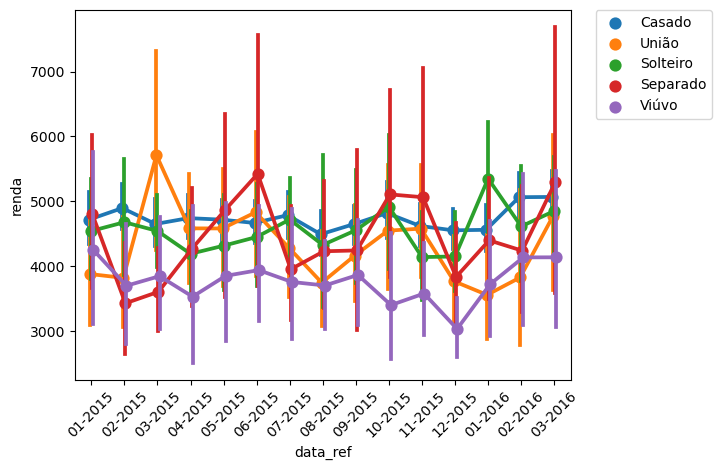

In [29]:
ax = sns.pointplot(x='data_ref', y='renda', hue='estado_civil', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

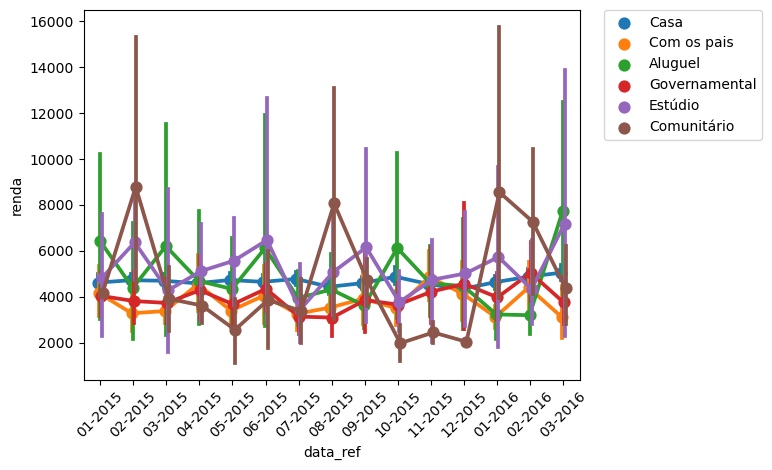

In [30]:
ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_residencia', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);


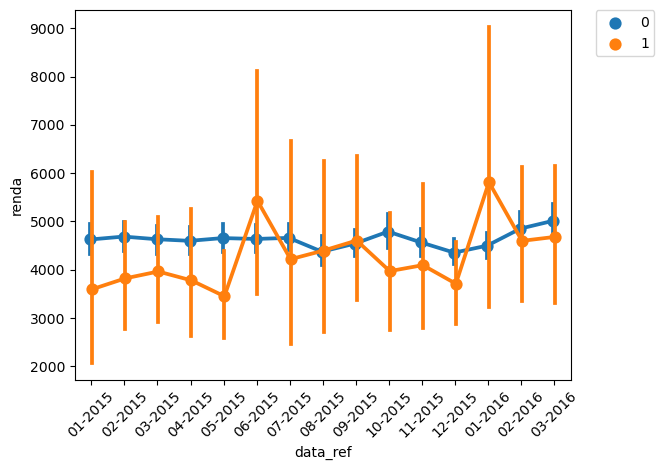

In [31]:
ax = sns.pointplot(x='data_ref', y='renda', hue='mau', data=df1, dodge=True, ci=95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);